In [1]:
import cv2
import glob
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
%matplotlib inline

In [2]:
#DO NOT RUN THIS BLOCK

images = glob.glob('camera_cal/*.jpg')
objpoints = []
imgpoints = []
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, mpimg.imread('camera_cal/calibration1.jpg').shape[::-1][1:],None,None)

dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
dist_pickle["rvecs"] = rvecs
dist_pickle["tvecs"] = tvecs
pickle.dump( dist_pickle, open( "dist_pickle.p", "wb" ) )

#DO NOT RUN THIS BLOCK

True

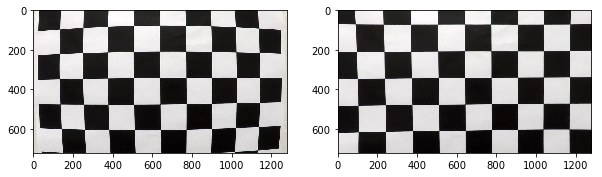

In [50]:
#DO NOT RUN THIS BLOCK

img = mpimg.imread('camera_cal/calibration1.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.imshow(img)
ax2.imshow(dst)
cv2.imwrite("myexamples/undistort_output.png", dst)

#DO NOT RUN THIS BLOCK

In [51]:
def undistort_img(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

In [54]:
img = cv2.imread('test_images/test1.jpg')
cv2.imwrite('./myexamples/test1_undist.jpg', undistort_img(img, mtx, dist))

True

[[ 89.32753754  72.510849  ]] [[ 229.96347046   73.55903625]] [[  95.23963165  210.66433716]] [[ 234.21749878  210.13775635]]
[[ 503.71166992   73.27488708]] [[ 638.40661621   73.01337433]] [[ 504.95703125  208.02406311]] [[ 639.59893799  207.3742218 ]]


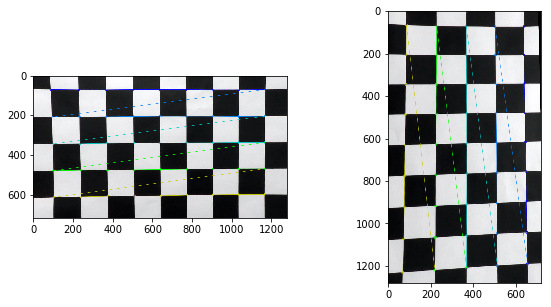

In [5]:
#Testing/Practice - DO NOT RUN THIS BLOCK

nx = 9 # the number of inside corners in x
ny = 5 # the number of inside corners in y
img = cv2.imread('camera_cal/calibration1.jpg')
width, height = img.shape[0], img.shape[1]
undist = undistort_img(img, mtx, dist)
ret, corners = cv2.findChessboardCorners(undist, (nx,ny),None)

print(corners[0], corners[1], corners[9], corners[10])
print(corners[3], corners[4], corners[12], corners[13])

src = np.float32([
       (corners[0][0][0], corners[0][0][1]),
       (corners[1][0][0], corners[1][0][1]),
       (corners[10][0][0], corners[10][0][1]),
       (corners[9][0][0], corners[9][0][1])])
dest = np.float32([
       (corners[4][0][0], corners[4][0][1]),
       (corners[13][0][0], corners[13][0][1]),
       (corners[12][0][0], corners[12][0][1]),
       (corners[3][0][0], corners[3][0][1])])
M = cv2.getPerspectiveTransform(src, dest)
Minv = cv2.getPerspectiveTransform(dest, src)
if ret == True:
    undist = cv2.drawChessboardCorners(undist, (nx,ny), corners, ret)
    warped = cv2.warpPerspective(undist, M, (width, height), flags=cv2.INTER_LINEAR)
    fig=plt.figure(figsize=(10,5))
    ax1=fig.add_subplot(1,2,1)
    ax2=fig.add_subplot(1,2,2)
    ax1.imshow(undist)
    ax2.imshow(warped)
    
#Testing/Practice - DO NOT RUN THIS BLOCK

In [3]:
def unwarp_img(img, M):
    h,w = img.shape[:2]
    warped = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
    return warped

True

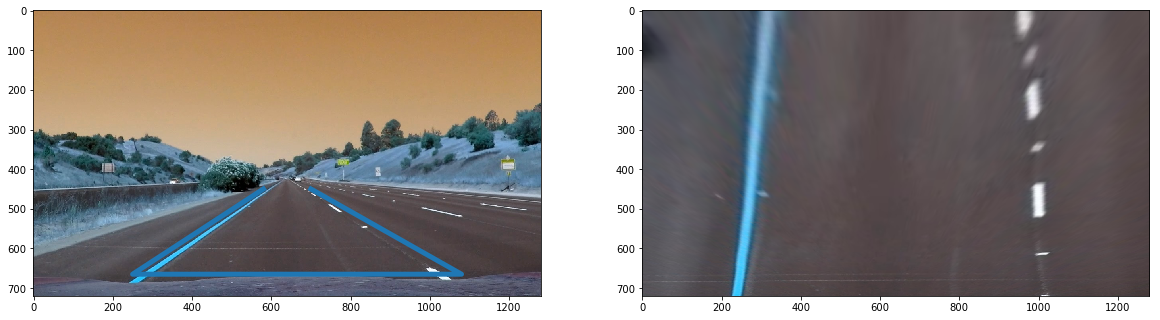

In [56]:
#DO NOT RUN THIS BLOCK
testimg = cv2.imread('test_images/straight_lines1.jpg')
offset = 200
undist = undistort_img(testimg, mtx, dist)
img_size = undist.shape[:2]

# define source and destination points for transform
src = np.float32([(580,450),
                  (250,665),
                  (1080,665),
                  (700,450)])
dest = np.float32([[offset, 0],
                  [offset, img_size[0]], 
                  [img_size[1]-offset, img_size[0]], 
                  [img_size[1]-offset, 0]])
M = cv2.getPerspectiveTransform(src, dest)
Minv = cv2.getPerspectiveTransform(dest, src)
warped = unwarp_img(undist, M)
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.imshow(testimg)
ax1.plot(src[:,0],src[:,1], lw=5)
ax2.imshow(warped);
cv2.imwrite('myexamples/warped_straight_lines.jpg', warped)
#DO NOT RUN THIS BLOCK

In [37]:
images = glob.glob('test_images/test*.jpg')
for idx,fname in enumerate(images):
    img = cv2.imread(fname)
    undist = undistort_img(img, mtx, dist)
    img_size = undist.shape[:2]
    warped = unwarp_img(undist, M)
    cv2.imwrite('test_images/perspectives/'+str(idx+1)+'.jpg', warped)

In [38]:
#DO NOT RUN THIS BLOCK

pers_pickle = {}
pers_pickle["M"] = M
pers_pickle["Minv"] = Minv
pickle.dump(pers_pickle, open( "pers_pickle.p", "wb" ))

#DO NOT RUN THIS BLOCK

In [28]:
# Define a function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, orient='x', thresh=(0,255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return binary_output

In [29]:
def color_threshold(img, sthresh=(100,255),vthresh=(50,255)):
    
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:, :, 2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= sthresh[0]) & (s_channel <= sthresh [1])] = 1
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    v_channel = hsv[:, :, 2]
    v_binary = np.zeros_like(v_channel)
    v_binary[(v_channel >= vthresh[0]) & (v_channel <= vthresh [1])] = 1
    
    output = np.zeros_like(s_channel)
    output[(s_binary==1) & (v_binary==1)] = 1

    return output

In [39]:
dist_pickle = pickle.load( open("dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [40]:
pers_pickle = pickle.load(open("pers_pickle.p", "rb" ))
M = pers_pickle["M"]
Minv = pers_pickle["Minv"]

In [41]:
class tracker:
    def __init__(self, Mywindow_width, Mywindow_height, Mymargin, My_ym=1, My_xm=1, Mysmooth_factor=15):
        self.recent_centers = []
        self.window_width=Mywindow_width
        self.window_height=Mywindow_height
        self.margin=Mymargin
        self.ym_per_pix=My_ym
        self.xm_per_pix=My_xm
        self.smooth_factor=Mysmooth_factor
        
    def find_window_centroids(self, warped):
        window_width=self.window_width
        window_height=self.window_height
        margin=self.window_height

        window_centroids=[]
        window = np.ones(window_width)
        l_sum = np.sum(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)], axis=0)
        l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
        r_sum = np.sum(warped[int(3*warped.shape[0]/4):,int(warped.shape[1]/2):], axis=0)
        r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(warped.shape[1]/2)

        # Add what we found for the first layer
        window_centroids.append((l_center,r_center))

        # Go through each layer looking for max pixel locations
        for level in range(1,(int)(warped.shape[0]/window_height)):
            # convolve the window into the vertical slice of the image
            image_layer = np.sum(warped[int(warped.shape[0]-(level+1)*window_height):int(warped.shape[0]-level*window_height),:], axis=0)
            conv_signal = np.convolve(window, image_layer)
            # Find the best left centroid by using past left center as a reference
            # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
            offset = window_width/2
            l_min_index = int(max(l_center+offset-margin,0))
            l_max_index = int(min(l_center+offset+margin,warped.shape[1]))
            l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
            # Find the best right centroid by using past right center as a reference
            r_min_index = int(max(r_center+offset-margin,0))
            r_max_index = int(min(r_center+offset+margin,warped.shape[1]))
            r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
            # Add what we found for that layer
            window_centroids.append((l_center,r_center))
        
        self.recent_centers.append(window_centroids)
        return np.average(self.recent_centers[-self.smooth_factor:], axis=0)

In [42]:
def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

In [43]:
def pipeline(img):
    
    preprocessImage = np.zeros_like(img[:,:,0])
    gradx=abs_sobel_thresh(img,orient='x',thresh=(12,255))
    grady=abs_sobel_thresh(img,orient='y',thresh=(24,255))
    c_binary=color_threshold(img,sthresh=(100,255),vthresh=(50,255))
    
    preprocessImage[((gradx == 1) | (grady == 1) | (c_binary==1))] = 255
    return preprocessImage

In [55]:
img=cv2.imread('myexamples/test1_undist.jpg')
cv2.imwrite('myexamples/binary_combo_example.jpg',pipeline(img))

True

In [61]:
images = glob.glob('test_images/test*.jpg')
# window settings
window_width = 100 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

for idx,fname in enumerate(images):
    img=cv2.imread(fname)
    undist = undistort_img(img, mtx, dist)
    warped = unwarp_img(undist, M)
    warped = pipeline(warped)
    curve_centers = tracker(Mywindow_width=window_width, Mywindow_height=window_height,Mymargin=margin, My_ym=10/720, My_xm=4/384, Mysmooth_factor=15)
    window_centroids = curve_centers.find_window_centroids(warped)
    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)
    leftx=[]
    rightx=[]
    # Go through each level and draw the windows 	
    for level in range(0,len(window_centroids)):
        leftx.append(window_centroids[level][0])
        rightx.append(window_centroids[level][1])
        # Window_mask is a function to draw window areas
        l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
        # Add graphic points from window mask here to total pixels found 
        l_points[(l_points == 255) | (l_mask == 1) ] = 255
        r_points[(r_points == 255) | (r_mask == 1) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8) # making the original road pixels 3 color channels
    result = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results
    
    yvals=range(0,warped.shape[0])
    res_yvals=np.arange(warped.shape[0] - (window_height/2), 0, -window_height)

    left_fit = np.polyfit(res_yvals, leftx, 2)
    left_fitx = left_fit[0]*yvals*yvals + left_fit[1]*yvals + left_fit[2]
    left_fitx = np.array(left_fitx, np.int32)

    right_fit = np.polyfit(res_yvals, rightx, 2)
    right_fitx = right_fit[0]*yvals*yvals + right_fit[1]*yvals + right_fit[2]
    right_fitx = np.array(right_fitx, np.int32)

    left_lane=np.array(list(zip(np.concatenate((left_fitx-window_width/2, left_fitx[::-1] + window_width/2), axis=0), np.concatenate((yvals, yvals[::-1]), axis=0))),np.int32)
    right_lane=np.array(list(zip(np.concatenate((right_fitx-window_width/2, right_fitx[::-1] + window_width/2), axis=0), np.concatenate((yvals, yvals[::-1]), axis=0))),np.int32)
    middle_marker=np.array(list(zip(np.concatenate((right_fitx-window_width/2, right_fitx[::-1] + window_width/2), axis=0), np.concatenate((yvals, yvals[::-1]), axis=0))),np.int32)
    
    road = np.zeros_like(img)
    road_bkg=np.zeros_like(img)
    cv2.fillPoly(road,[left_lane],color=(255,0,0))
    cv2.fillPoly(road,[right_lane],color=(0,0,255))
    cv2.fillPoly(road_bkg,[left_lane],color=(255,255,255))
    cv2.fillPoly(road_bkg,[right_lane],color=(255,255,255))
    
    road_warped = unwarp_img(road, Minv)
    road_warped_bkg = unwarp_img(road, Minv)
    
    base = cv2.addWeighted(img, 1.0, road_warped_bkg, -1.0, 0.0)
    result = cv2.addWeighted(base, 1.0, road_warped, 1.0, 0.0)
    
    #cv2.imwrite('myexamples/color_fit_lines.jpg',road)
    
    xm_per_pix = curve_centers.xm_per_pix
    ym_per_pix = curve_centers.ym_per_pix
    
    curve_fit_cr = np.polyfit(np.array(res_yvals, np.float32)*ym_per_pix, np.array(leftx, np.float32)*xm_per_pix, 2)
    curverad = ((1 + (2*curve_fit_cr[0]*yvals[-1]*ym_per_pix + curve_fit_cr[1])**2)**1.5) / np.absolute(2*curve_fit_cr[0])
    
    camera_center= (left_fitx[-1] + right_fitx[-1])/2
    center_diff = (camera_center-warped.shape[1]/2)*xm_per_pix
    side_pos = 'left'
    if center_diff <= 0:
        center_diff = center_diff*(-1)
        side_pos = 'right'
        
    cv2.putText(result, 'Radius of curvature = '+str(round(curverad,3)) + '(m)', (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(result, 'Vehicle is = '+str(round(center_diff,3)) + 'm ' + side_pos +' of center', (50,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

    write_name='test_images/tracked/' + str(idx+1) +'.jpg'
    cv2.imwrite(write_name, result)
    

In [45]:
def process_image(img):
    undist = undistort_img(img, mtx, dist)
    warped = unwarp_img(undist, M)
    warped = pipeline(warped)
    curve_centers = tracker(Mywindow_width=window_width, Mywindow_height=window_height,Mymargin=margin, My_ym=10/720, My_xm=4/384, Mysmooth_factor=15)
    window_centroids = curve_centers.find_window_centroids(warped)
    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)
    leftx=[]
    rightx=[]
    # Go through each level and draw the windows 	
    for level in range(0,len(window_centroids)):
        leftx.append(window_centroids[level][0])
        rightx.append(window_centroids[level][1])
        # Window_mask is a function to draw window areas
        l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
        # Add graphic points from window mask here to total pixels found 
        l_points[(l_points == 255) | (l_mask == 1) ] = 255
        r_points[(r_points == 255) | (r_mask == 1) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8) # making the original road pixels 3 color channels
    result = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results

    yvals=range(0,warped.shape[0])
    res_yvals=np.arange(warped.shape[0] - (window_height/2), 0, -window_height)

    left_fit = np.polyfit(res_yvals, leftx, 2)
    left_fitx = left_fit[0]*yvals*yvals + left_fit[1]*yvals + left_fit[2]
    left_fitx = np.array(left_fitx, np.int32)

    right_fit = np.polyfit(res_yvals, rightx, 2)
    right_fitx = right_fit[0]*yvals*yvals + right_fit[1]*yvals + right_fit[2]
    right_fitx = np.array(right_fitx, np.int32)

    left_lane=np.array(list(zip(np.concatenate((left_fitx-window_width/2, left_fitx[::-1] + window_width/2), axis=0), np.concatenate((yvals, yvals[::-1]), axis=0))),np.int32)
    right_lane=np.array(list(zip(np.concatenate((right_fitx-window_width/2, right_fitx[::-1] + window_width/2), axis=0), np.concatenate((yvals, yvals[::-1]), axis=0))),np.int32)
    inner_lane=np.array(list(zip(np.concatenate((left_fitx+window_width/2, right_fitx[::-1]-window_width/2), axis=0), np.concatenate((yvals, yvals[::-1]), axis=0))),np.int32)

    road = np.zeros_like(img)
    road_bkg=np.zeros_like(img)
    cv2.fillPoly(road,[left_lane],color=(255,0,0))
    cv2.fillPoly(road,[right_lane],color=(0,0,255))
    cv2.fillPoly(road,[inner_lane],color=(0,255,0))
    cv2.fillPoly(road_bkg,[left_lane],color=(255,255,255))
    cv2.fillPoly(road_bkg,[right_lane],color=(255,255,255))

    road_warped = unwarp_img(road, Minv)
    road_warped_bkg = unwarp_img(road, Minv)

    base = cv2.addWeighted(img, 1.0, road_warped_bkg, -1.0, 0.0)
    result = cv2.addWeighted(base, 1.0, road_warped, 0.7, 0.0)

    xm_per_pix = curve_centers.xm_per_pix
    ym_per_pix = curve_centers.ym_per_pix

    curve_fit_cr = np.polyfit(np.array(res_yvals, np.float32)*ym_per_pix, np.array(leftx, np.float32)*xm_per_pix, 2)
    curverad = ((1 + (2*curve_fit_cr[0]*yvals[-1]*ym_per_pix + curve_fit_cr[1])**2)**1.5) / np.absolute(2*curve_fit_cr[0])

    camera_center= (left_fitx[-1] + right_fitx[-1])/2
    center_diff = (camera_center-warped.shape[1]/2)*xm_per_pix
    side_pos = 'left'
    if center_diff <= 0:
        center_diff = center_diff*(-1)
        side_pos = 'right'

    cv2.putText(result, 'Radius of curvature = '+str(round(curverad,3)) + '(m)', (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(result, 'Vehicle is = '+str(round(center_diff,3)) + 'm ' + side_pos +' of center', (50,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    
    return result

In [46]:
Output_video = 'output1_tracked.mp4'
Input_video = 'project_video.mp4'

In [47]:
clip1 = VideoFileClip(Input_video)
video_clip = clip1.fl_image(process_image)

In [48]:
video_clip.write_videofile(Output_video, audio=False)

[MoviePy] >>>> Building video output1_tracked.mp4
[MoviePy] Writing video output1_tracked.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [01:57<00:00, 10.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output1_tracked.mp4 

